#### Run and understand `pytao_basic_examples.ipynb` first !!

## Tao initialization

In [3]:
from pytao import Tao

In [4]:
# This activates tao, and a plot window (with Xquartz) should pop up.
# If this crashes the kernel, try again with -noplot option below.
tao = Tao('-init tao.init')

#tao = Tao('-init tao.init -noplot')

## Tao optimization
#### Tao data and variables are defined in `tao.init`
#### run 'alias' to learn some special commands below

In [5]:
%%tao
sho dat
sho var

-------------------------
Tao> sho dat

  Name                                 Using for Optimization
  twiss.end[1:6]                                 Using: 1:6
  twiss.max[1:2]                                 Using: 1:2
-------------------------
Tao> sho var
       Name                                      Using for Optimization
    quad[1:6]
-------------------------
Tao> 


In [6]:
%%tao
sho top

-------------------------
Tao> sho top

! Top 10

Constraints                     Ref_Ele    Start_Ele   Ele/S    Meas-or-Lim    Model       Merit      Max_Loc
twiss.end[3]  beta.b <target>                         END        1.2500E+01   1.7445E+00  1.157E+03
twiss.end[4]  alpha.b <target>                        END       -1.0000E+00  -4.7046E-01  2.804E+01
twiss.end[1]  beta.a <target>                         END        1.2500E+01   1.1892E+01  3.693E+00
twiss.end[2]  alpha.a <target>                        END       -1.0000E+00  -1.1741E+00  3.030E+00
twiss.end[5]  eta.x <target>                          END        0.0000E+00  -1.3878E-16  1.926E-31
twiss.max[2]  eta.x <abs_max>             Q1          END        1.0000E+00   2.1440E-01  0.000E+00  B2
twiss.max[1]  beta.a <max>                Q1          END        1.0000E+02   1.1892E+01  0.000E+00  P5
twiss.end[6]  etap.x <target>                         END        0.0000E+00   0.0000E+00  0.000E+00
Constraints                     

In [7]:
%%tao 
SLD
vv
vd
use dat twiss.end[1:6]
use dat twiss.max[1:2]
use var quad[1:6]

-------------------------
Tao> SLD
-------------------------
Tao> vv
  quad[1:6]                                      Using:
-------------------------
Tao> vd
  twiss.end[1:6]                                 Using:
  twiss.max[1:2]                                 Using:
-------------------------
Tao> use dat twiss.end[1:6]
  twiss.end[1:6]                                 Using: 1:6
  twiss.max[1:2]                                 Using:
-------------------------
Tao> use dat twiss.max[1:2]
  twiss.end[1:6]                                 Using: 1:6
  twiss.max[1:2]                                 Using: 1:2
-------------------------
Tao> use var quad[1:6]
  quad[1:6]                                      Using: 1:6
-------------------------
Tao> 


In [8]:
%%tao
sho merit

-------------------------
Tao> sho merit

! Top 10

Constraints                     Ref_Ele    Start_Ele   Ele/S    Meas-or-Lim    Model       Merit      Max_Loc
twiss.end[3]  beta.b <target>                         END        1.2500E+01   1.7445E+00  1.157E+03
twiss.end[4]  alpha.b <target>                        END       -1.0000E+00  -4.7046E-01  2.804E+01
twiss.end[1]  beta.a <target>                         END        1.2500E+01   1.1892E+01  3.693E+00
twiss.end[2]  alpha.a <target>                        END       -1.0000E+00  -1.1741E+00  3.030E+00
twiss.end[5]  eta.x <target>                          END        0.0000E+00  -1.3878E-16  1.926E-31
quad[6]       Q6[K1]                                  4.35      -1.0000E+30   0.0000E+00  0.000E+00
quad[5]       Q5[K1]                                  3.95      -1.0000E+30   0.0000E+00  0.000E+00
quad[4]       Q4[K1]                                  3.15      -1.0000E+30   0.0000E+00  0.000E+00
quad[3]       Q3[K1]                  

#### Note that the merit value is high due to optics mismatching

In [9]:
%%tao
run

-------------------------
Tao> run
Optimizing with: lmdif
Type ``.'' to stop the optimizer before it's finished.
  Cycle      Merit
    1    1.1916E+03
    2    1.1916E+03
    3    1.1916E+03
    4    1.1916E+03
    5    1.1916E+03
    6    1.1916E+03
    7    1.1916E+03
    8    1.1236E+03
    9    1.1236E+03
   10    1.1236E+03
   11    1.1236E+03
   12    1.1236E+03
   13    1.1236E+03
   14    1.1236E+03
   15    3.7524E+02
   16    3.7524E+02
   17    3.7524E+02
   18    3.7524E+02
   19    3.7524E+02
   20    3.7524E+02
   21    3.7524E+02
   22    3.1008E+01
   23    3.1008E+01
   24    3.1008E+01
   25    3.1008E+01
   26    3.1008E+01
   27    3.1008E+01
   28    3.1008E+01
   29    1.6238E+02
   30    1.0260E+01
   31    1.0260E+01
   32    1.0260E+01
   33    1.0260E+01
   34    1.0260E+01
   35    1.0260E+01
   36    1.0260E+01
   37    8.5867E+00
   38    8.5867E+00
   39    8.5867E+00
   40    8.5867E+00
   41    8.5867E+00
   42    8.5867E+00
   43    8.5867E+00
   44   

#### Optimization above fails to converge.
#### A better initial guess is required.
#### We can call optimization using an external tao script.

In [10]:
%%tao
call Optimize.tao

-------------------------
Tao> call Optimize.tao

Tao: ! Some educational "guess" of the initial condition

Tao: set ele Q1 k1 = 6

Tao: set ele Q2 k1 = -18

Tao: set ele Q3 k1 = 16

Tao: set ele Q4 k1 = -16

Tao: set ele Q5 k1 = -1.4

Tao: set ele Q6 k1 = 2.4

Tao: set global quiet = all ! This prevents further output messages to terminal
-------------------------
Tao> 


#### Merit has dropped significantly. Optimization complete.

In [11]:
tao.merit()

['  6.52063184606780E-28']

Text(0, 0.5, '$\\beta$ (m)')

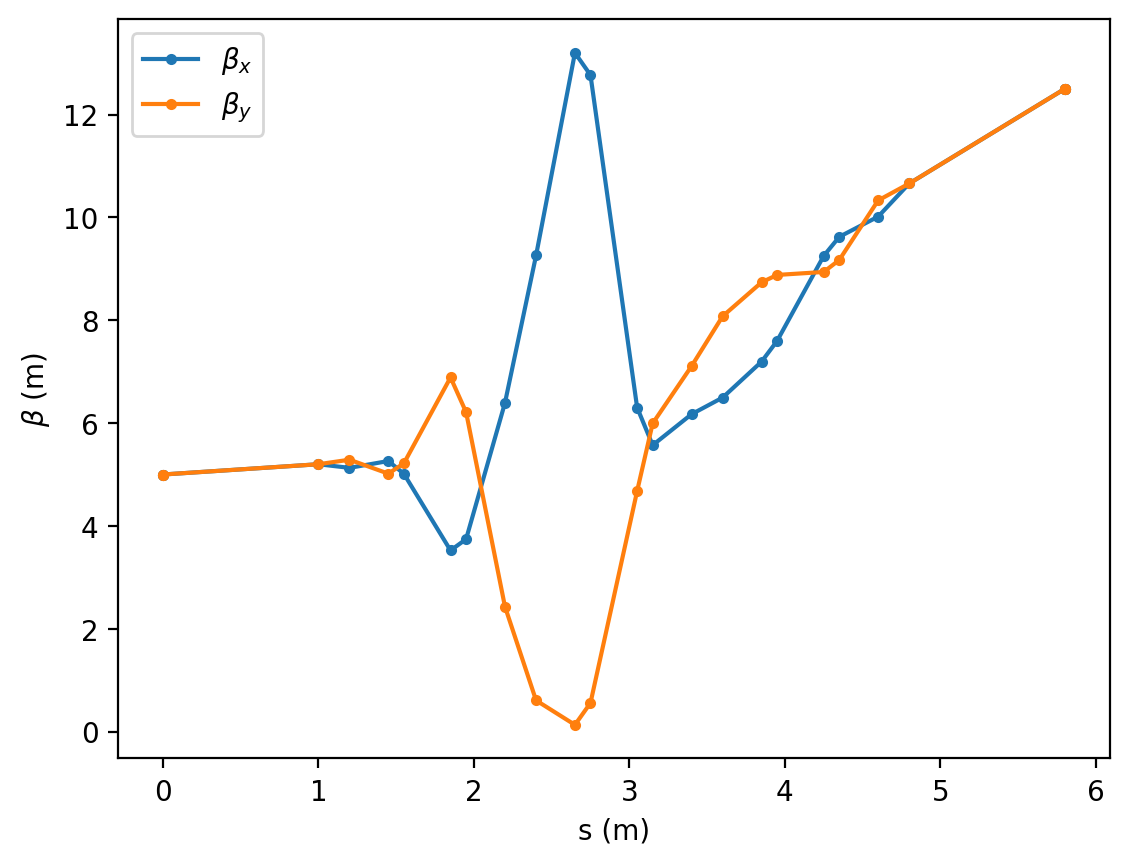

In [17]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np

plt.plot(
    tao.lat_list('*', 'ele.s'),
    tao.lat_list('*', 'ele.a.beta'),
    marker = '.',
    label = r'$\beta_x$'
)

plt.plot(
    tao.lat_list('*', 'ele.s'),
    tao.lat_list('*', 'ele.b.beta'),
    marker = '.',
    label = r'$\beta_y$'
)

plt.legend()
plt.xlabel('s (m)')
plt.ylabel(r'$\beta$ (m)')